# Modelos de mezclas Gaussianas - GMM

## Modelos de mezclas

Un modelo de mezclas es un tipo de modelo de densidad de probabilidad donde se asume que los datos están gobernado por un número de componentes de distribución. Si estas distribuciones son Gaussianas, entonces el modelo se convierte en un modelo de mezclas Gaussianas. Estos compoentes de distribución se combinan con el fin de proveer una función de densida multimodal, que se convierte finalmente en un modelo de mezlcas.

***Ejemplo***
>Spongamos que queremos modelar los hábitos de compras de todas las personas en Suramérica. Una forma es modelar todo el continente y ajuntar todo a un solo modelo, sin embargo sabemos que las personas en diferentes países compran de diferentes maneras. Debemos entonces entender cómo compran las personas en cada país individualmente.

>En este caso, si queremos obtener un modelo representativo, debemos tener en cuenta todas las variaciones dentro del continente. Sería entonces conveniente utilizar un modelo de mezclas para modelar los hábitos en países individuales y luego combinarlos todos en en un Modelo de Mezclas.

Algo interesante que vale la pena resaltar en un modelo de mezclas se que es semiparamétrico, es decir, depende parcialmente de un conjunto de funciones predefinidas. Éstas tienen gran precisión y flexibilidad en el modelamiento de distribuciones subyacentes de los datos. También pueden suavizar las brechas que resultan de tener datos dispersos.

Si se define la función, entonces el modelo de mezclas pasa de ser semi-paramétrico a paramétrico. Es por ello que un GMM es un modelo paramétrico representado por una suma ponderada de funciones
Guassianas. Se asume entonces que los datos han sido generados por un conjunto de modelos Gaussianos que han sido combinados de alguna manera. Los GMM son bastante potentes y utilizados en una amplia variedad de casos. Los parámetros del GMM se estiman con el conjunto de datos de entrenamiento usando algoritmos de estimación como **Expectation-Maximization (EM)** o **Maximum  A-posteriori (MAP)**. Algunas aplicaciones populares de los GMM incluyen la recuperación de bases de dastos de imágenes, el modelamiento de fluctuaciones de mercado, verificación biométrica, entre otros.

## Construcción de un clasificador basado en GMM 

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import patches 
 
from sklearn import datasets 
from sklearn.mixture import GMM 
from sklearn.cross_validation import StratifiedKFold

# Load the iris dataset 
iris = datasets.load_iris()
# Split dataset into training and testing (80/20 split) 
indices = StratifiedKFold(iris.target, n_folds=5) #el data set se divide en 5 partes
# Take the first fold 
train_index, test_index = next(iter(indices))  #se usa para moverse en un ciclo,por cada next se hace el siguiente elemento
 
# Extract training data and labels 
X_train = iris.data[train_index] 
y_train = iris.target[train_index]
# Extract testing data and labels 
X_test = iris.data[test_index] 
y_test = iris.target[test_index]

# Extract the number of classes 
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [18]:
# Build GMM 
classifier = GMM(n_components=num_classes, covariance_type='full',  
        init_params='wc', n_iter=20) #n_iter : num de iter de EM, wc pesos y covarianzas se actualizan en cada iteración
# Initialize the GMM means  
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0) 
                              for i in range(num_classes)])
print(classifier.means_)

[[ 5.0425  3.445   1.4675  0.25  ]
 [ 5.895   2.745   4.2325  1.3125]
 [ 6.5925  2.9825  5.4975  2.0225]]


C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
# Train the GMM classifier  
classifier.fit(X_train)

C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=Depr

GMM(covariance_type='full', init_params='wc', min_covar=0.001, n_components=3,
  n_init=1, n_iter=20, params='wmc', random_state=None, tol=0.001,
  verbose=0)

Accuracy on training data = 87.5
Accuracy on testing data = 86.6666666667


C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\LMSEPULVEDA\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


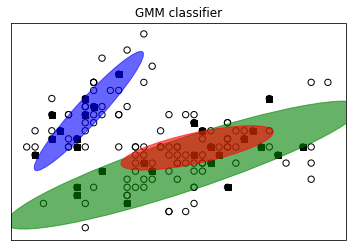

In [28]:
# Draw boundaries 
plt.figure() 
colors = 'bgr'  #colores rgb
for i, color in enumerate(colors): 
    # Extract eigenvalues and eigenvectors 
    eigenvalues, eigenvectors = np.linalg.eigh( 
            classifier._get_covars()[i][:2, :2]) #valores y vectores propios de la matriz de covarianzas de 2x2 (2dimensiones)
    
     # Normalize the first eigenvector 
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])    
    # Extract the angle of tilt 
    angle = np.arctan2(norm_vec[1], norm_vec[0]) 
    angle = 180 * angle / np.pi
    # Scaling factor to magnify the ellipses 
    # (random value chosen to suit our needs) 
    scaling_factor = 8 
    eigenvalues *= scaling_factor
    # Draw the ellipse 
    ellipse = patches.Ellipse(classifier.means_[i, :2],  
    eigenvalues[0], eigenvalues[1], 180 + angle,  
    color=color) 
    axis_handle = plt.subplot(1, 1, 1) 
    ellipse.set_clip_box(axis_handle.bbox) 
    ellipse.set_alpha(0.6)  #transparencia
    axis_handle.add_artist(ellipse)

# Plot the data  
colors = 'bgr' 
for i, color in enumerate(colors): 
    cur_data = iris.data[iris.target == i] 
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o',  
            facecolors='none', edgecolors='black', s=40,  
            label=iris.target_names[i])
    
    test_data = X_test[y_test == i] 
    plt.scatter(test_data[:,0], test_data[:,1], marker='s',  
            facecolors='black', edgecolors='black', s=40,  
            label=iris.target_names[i])
# Compute predictions for training and testing data 
y_train_pred = classifier.predict(X_train) 
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training) 
 
y_test_pred = classifier.predict(X_test) 
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100 
print('Accuracy on testing data =', accuracy_testing) 
 
plt.title('GMM classifier') 
plt.xticks(()) 
plt.yticks(()) 
 
plt.show()

In [31]:
classifier._get_covars()

array([[[ 0.12742339,  0.10202453,  0.01487202,  0.00987949],
        [ 0.10202453,  0.15383452,  0.00994044,  0.0095081 ],
        [ 0.01487202,  0.00994044,  0.03519449,  0.00587672],
        [ 0.00987949,  0.0095081 ,  0.00587672,  0.01350119]],

       [[ 0.50953863,  0.14762504,  0.589433  ,  0.19190402],
        [ 0.14762504,  0.13221438,  0.16166516,  0.06466709],
        [ 0.589433  ,  0.16166516,  0.83480265,  0.26159091],
        [ 0.19190402,  0.06466709,  0.26159091,  0.09842574]],

       [[ 0.22412839,  0.03965446,  0.14379041,  0.07662981],
        [ 0.03965446,  0.0561054 ,  0.03449518,  0.02723644],
        [ 0.14379041,  0.03449518,  0.15664269,  0.08398089],
        [ 0.07662981,  0.02723644,  0.08398089,  0.08027814]]])

In [14]:

a= np.array([1,2,3,4])
a = iter(a)
print(next(a))
print(next(a))

1
2
